In [9]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as ss
import seaborn as sns
#from colorsetup import colors, palette
#sns.set_palette(palette)
% matplolib inline

UsageError: Line magic function `%` not found.


In [10]:
np.random.seed(42)

time=np.arange(100)
stationary=np.random.normal(loc=0,scale=1,size=len(time))

In [11]:
def run_sequence_plot(x,y,title,xlabel='time',ylabel='series'):
    plt.plot(x,y,'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)

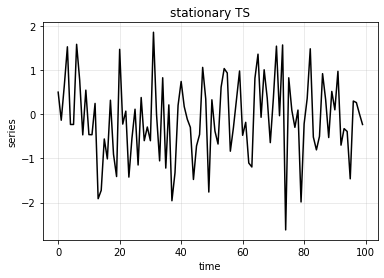

In [12]:
run_sequence_plot(time,stationary,title='stationary TS')

In [14]:
#autocorrelationn
seed=3.14

lagged=np.empty_like(time,dtype='float')
for t in time:
    lagged[t]=seed+np.random.normal(loc=0,scale=2.5,size=1)
    seed=lagged[t]

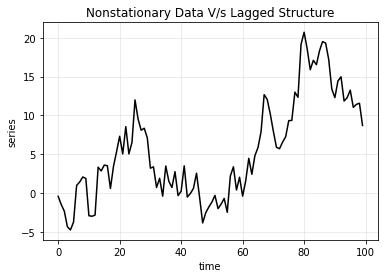

In [15]:
run_sequence_plot(time,lagged,'Nonstationary Data V/s Lagged Structure')

In [16]:
from statsmodels.tsa.stattools import adfuller

adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(stationary)

In [17]:
print(adf)

-10.08442591366971


In [18]:
print(pvalue)

1.1655044784188918e-17


In [19]:
print(nobs)

99


In [20]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [27]:
#trend
trend=0.5+ time*2.5
seasonality=10*np.sin(time)*10

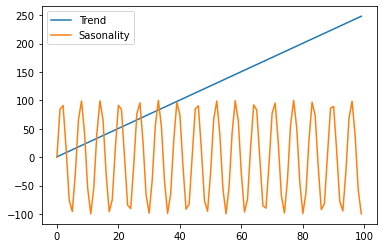

In [28]:
plt.plot(time,trend,label='Trend')
plt.plot(time,seasonality,label='Sasonality')
plt.legend()
plt.show()

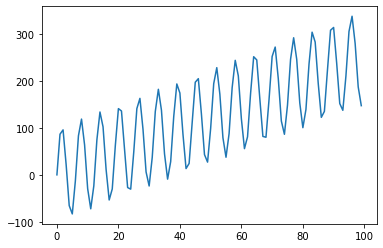

In [29]:
non_stationary=trend+seasonality
plt.plot(time,non_stationary)
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usediag,nobs,critical_values,icebest=adfuller(non_stationary)
print(adf)
print(pvalue) #given series is nonstationary

-0.40608863127585937
0.909077219766484


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(non_stationary,model='additive',freq=6)
trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

C:\Users\HP\AppData\Local\Temp/ipykernel_8680/1824914702.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose=seasonal_decompose(non_stationary,model='additive',freq=6)


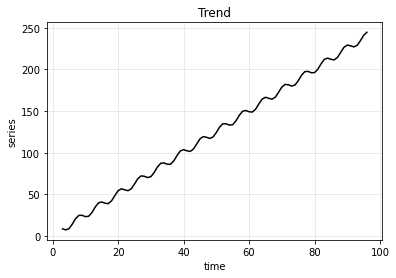

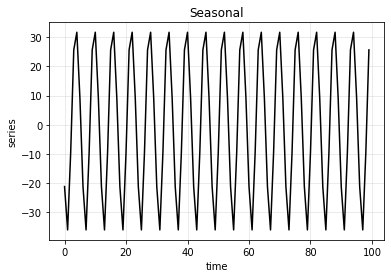

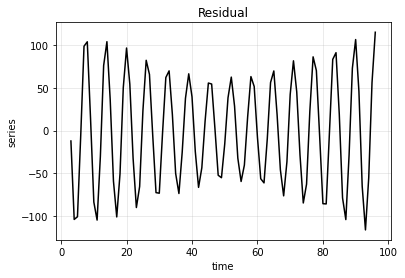

In [36]:
run_sequence_plot(time,trend,title='Trend')
plt.show()
run_sequence_plot(time,seasonal,title='Seasonal')
plt.show()
run_sequence_plot(time,residual,title='Residual')

In [38]:
residual

array([          nan,           nan,           nan,  -12.17526544,
       -104.14149918, -100.97221522,   -5.58123862,   98.89280976,
        104.10378233,   13.75785054,  -83.77945   , -104.90200695,
        -30.18983886,   76.23043458,  104.22331544,   36.54939375,
        -59.27033641, -101.20888898,  -50.70815215,   50.36513265,
         96.79146417,   54.38380293,  -32.56654033,  -90.18705298,
        -65.50170141,   23.35731909,   82.40024555,   65.84039927,
         -5.79527087,  -72.71449207,  -73.39204098,   -2.64157915,
         62.19605579,   70.00655688,   18.91088801,  -50.18306045,
        -73.75063094,  -25.56050473,   37.78834906,   66.55040201,
         39.58385786,  -24.38759904,  -66.54890622,  -43.5737492 ,
         11.1214293 ,   55.74725   ,   54.57684174,    2.6170405 ,
        -52.36055208,  -55.24638782,  -15.68043196,   38.45767374,
         62.69550715,   28.67968405,  -32.31580468,  -59.64858489,
        -40.48221382,   16.05895095,   63.29312587,   51.72419

In [40]:
adf,p,r,t,f,g=adfuller(residual[3:-3])

In [41]:
p  #========> given series is stationary

0.0

In [49]:
var1=np.random.normal(loc=0,scale=1,size=50)
var2=np.random.normal(loc=0,scale=10,size=50)
heteroscedasticity=np.append(var1,var2)


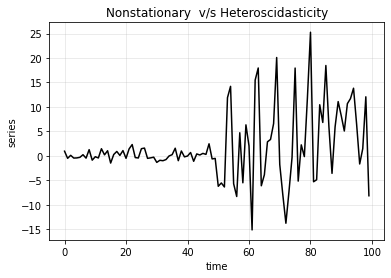

In [50]:
#remove changing variance with log transformation

run_sequence_plot(time,heteroscedasticity,title='Nonstationary  v/s Heteroscidasticity')

In [51]:
adfuller(heteroscedasticity)

(-2.7127288107599976,
 0.07186141030017187,
 6,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 586.2527610187396)

In [54]:
#log transformations
new_hetro=heteroscedasticity+40
log_new_hetero=np.log(new_hetro)

In [55]:
adfuller(log_new_hetero)

(-2.9982388419513177,
 0.03505919792905026,
 6,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 -66.50310729003633)

In [60]:
#removing autocorrelation with differnecing
difference=lagged[:-1]-lagged[1:]
df=pd.DataFrame({'original':lagged[:-1],'shift':lagged[1:]})
df

,original,shift
0,-0.398427,-1.450040
1,-1.450040,-2.306826
2,-2.306826,-4.312520
3,-4.312520,-4.715734
4,-4.715734,-3.705607
...,...,...
94,12.290088,13.253382
95,13.253382,11.043738
96,11.043738,11.428051
97,11.428051,11.573573


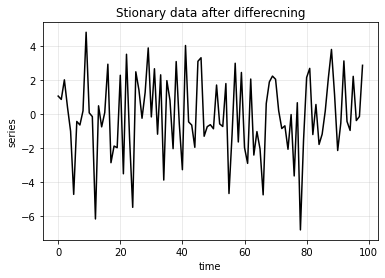

In [61]:
run_sequence_plot(time[:-1],difference,title='Stionary data after differecning')

In [62]:
adfuller(difference)

(-10.809982939729169,
 1.9196947925176547e-19,
 0,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 390.318554108211)